## Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it. First, load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expec_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

## Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [2]:
life_expec_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_expec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.34036759700476515
Percent null values in Adult Mortality : 0.34036759700476515
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 6.603131381892444
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 18.82232811436351
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 1.1572498298162015
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.6466984343090538
Percent null values in Total expenditure : 7.6923076923076925
Percent null values in Diphtheria  : 0.6466984343090538
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 15.248468345813478
Percent null values in Population : 22.19196732471069
Percent null values in  thinness  1-19 years : 1.1572498298162015
Percent null values in  thinness 5-9 years : 1.15724982981

Missing values: I think using imputation within each country is the best method because the values can't be assumed to be continuous across different countries, or potentially even within a country. This is why I replaced NaN values with the mean value for that country and data column. 

In [5]:
countries = life_expec_df["Country"].unique()
fill_list = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
            'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
             'Income composition of resources', 'Schooling']

for col in fill_list:
    for country in countries:
        life_expec_df.loc[life_expec_df["Country"] == country, col] = life_expec_df.loc[life_expec_df["Country"] == country, col].fillna(
            life_expec_df[life_expec_df["Country"] == country][col].mean())
        
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.34036759700476515
Percent null values in Adult Mortality : 0.34036759700476515
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 0.5786249149081008
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 4.901293396868618
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 1.1572498298162015
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 1.0891763104152485
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 13.78488767869299
Percent null values in Population : 22.05582028590878
Percent null values in  thinness  1-19 years : 1.1572498298162015
Percent null values in  thinness 5-9 years : 1.1572498298162015
Percent null values in I

Using imputation helped decrease the number of NaN values in Alcohol, Hepatitis B, Polio, Total Expenditure, Diptheria and GDP. Unfortunately there is still a big problem in the Population column. I see three ways to handle this problem: use imputation across all countries, drop the rows containing NaN values, or drop the Population and GDP columns. The benefit of using imputation across all countries would be that all of the other data contained in other columns would be preserved, the problem would be that I would be spiking the mean value, invalidating the Population and GDP column information. The benefit of dropping the rows would be that I would preserve only actual data but the cost would be tremendous. I would lose all information on over 20% of the data set, potentially corrupting the entire set. Lastly the benefit of dropping the Population and GDP columns and then dropping the NaN's that are left would be that I would be removing two factors but preserving the rest of the information. 

After weighing the options I feel that using imputation across countries is the best approach. The GDP and Population columns will be significantly corrupted but I will preserve the other information that those countries contain. 

In [6]:
for col in fill_list:
    life_expec_df.loc[:,col] = life_expec_df.loc[:,col].fillna(life_expec_df.loc[:,col].mean())
    
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 0.0
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 0.0
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 0.0
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 0.0
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in  thinness  1-19 years : 0.0
Percent null values in  thinness 5-9 years : 0.0
Percent null values in Income composition of resources : 0.0
Percent null values in Schooling : 0.0


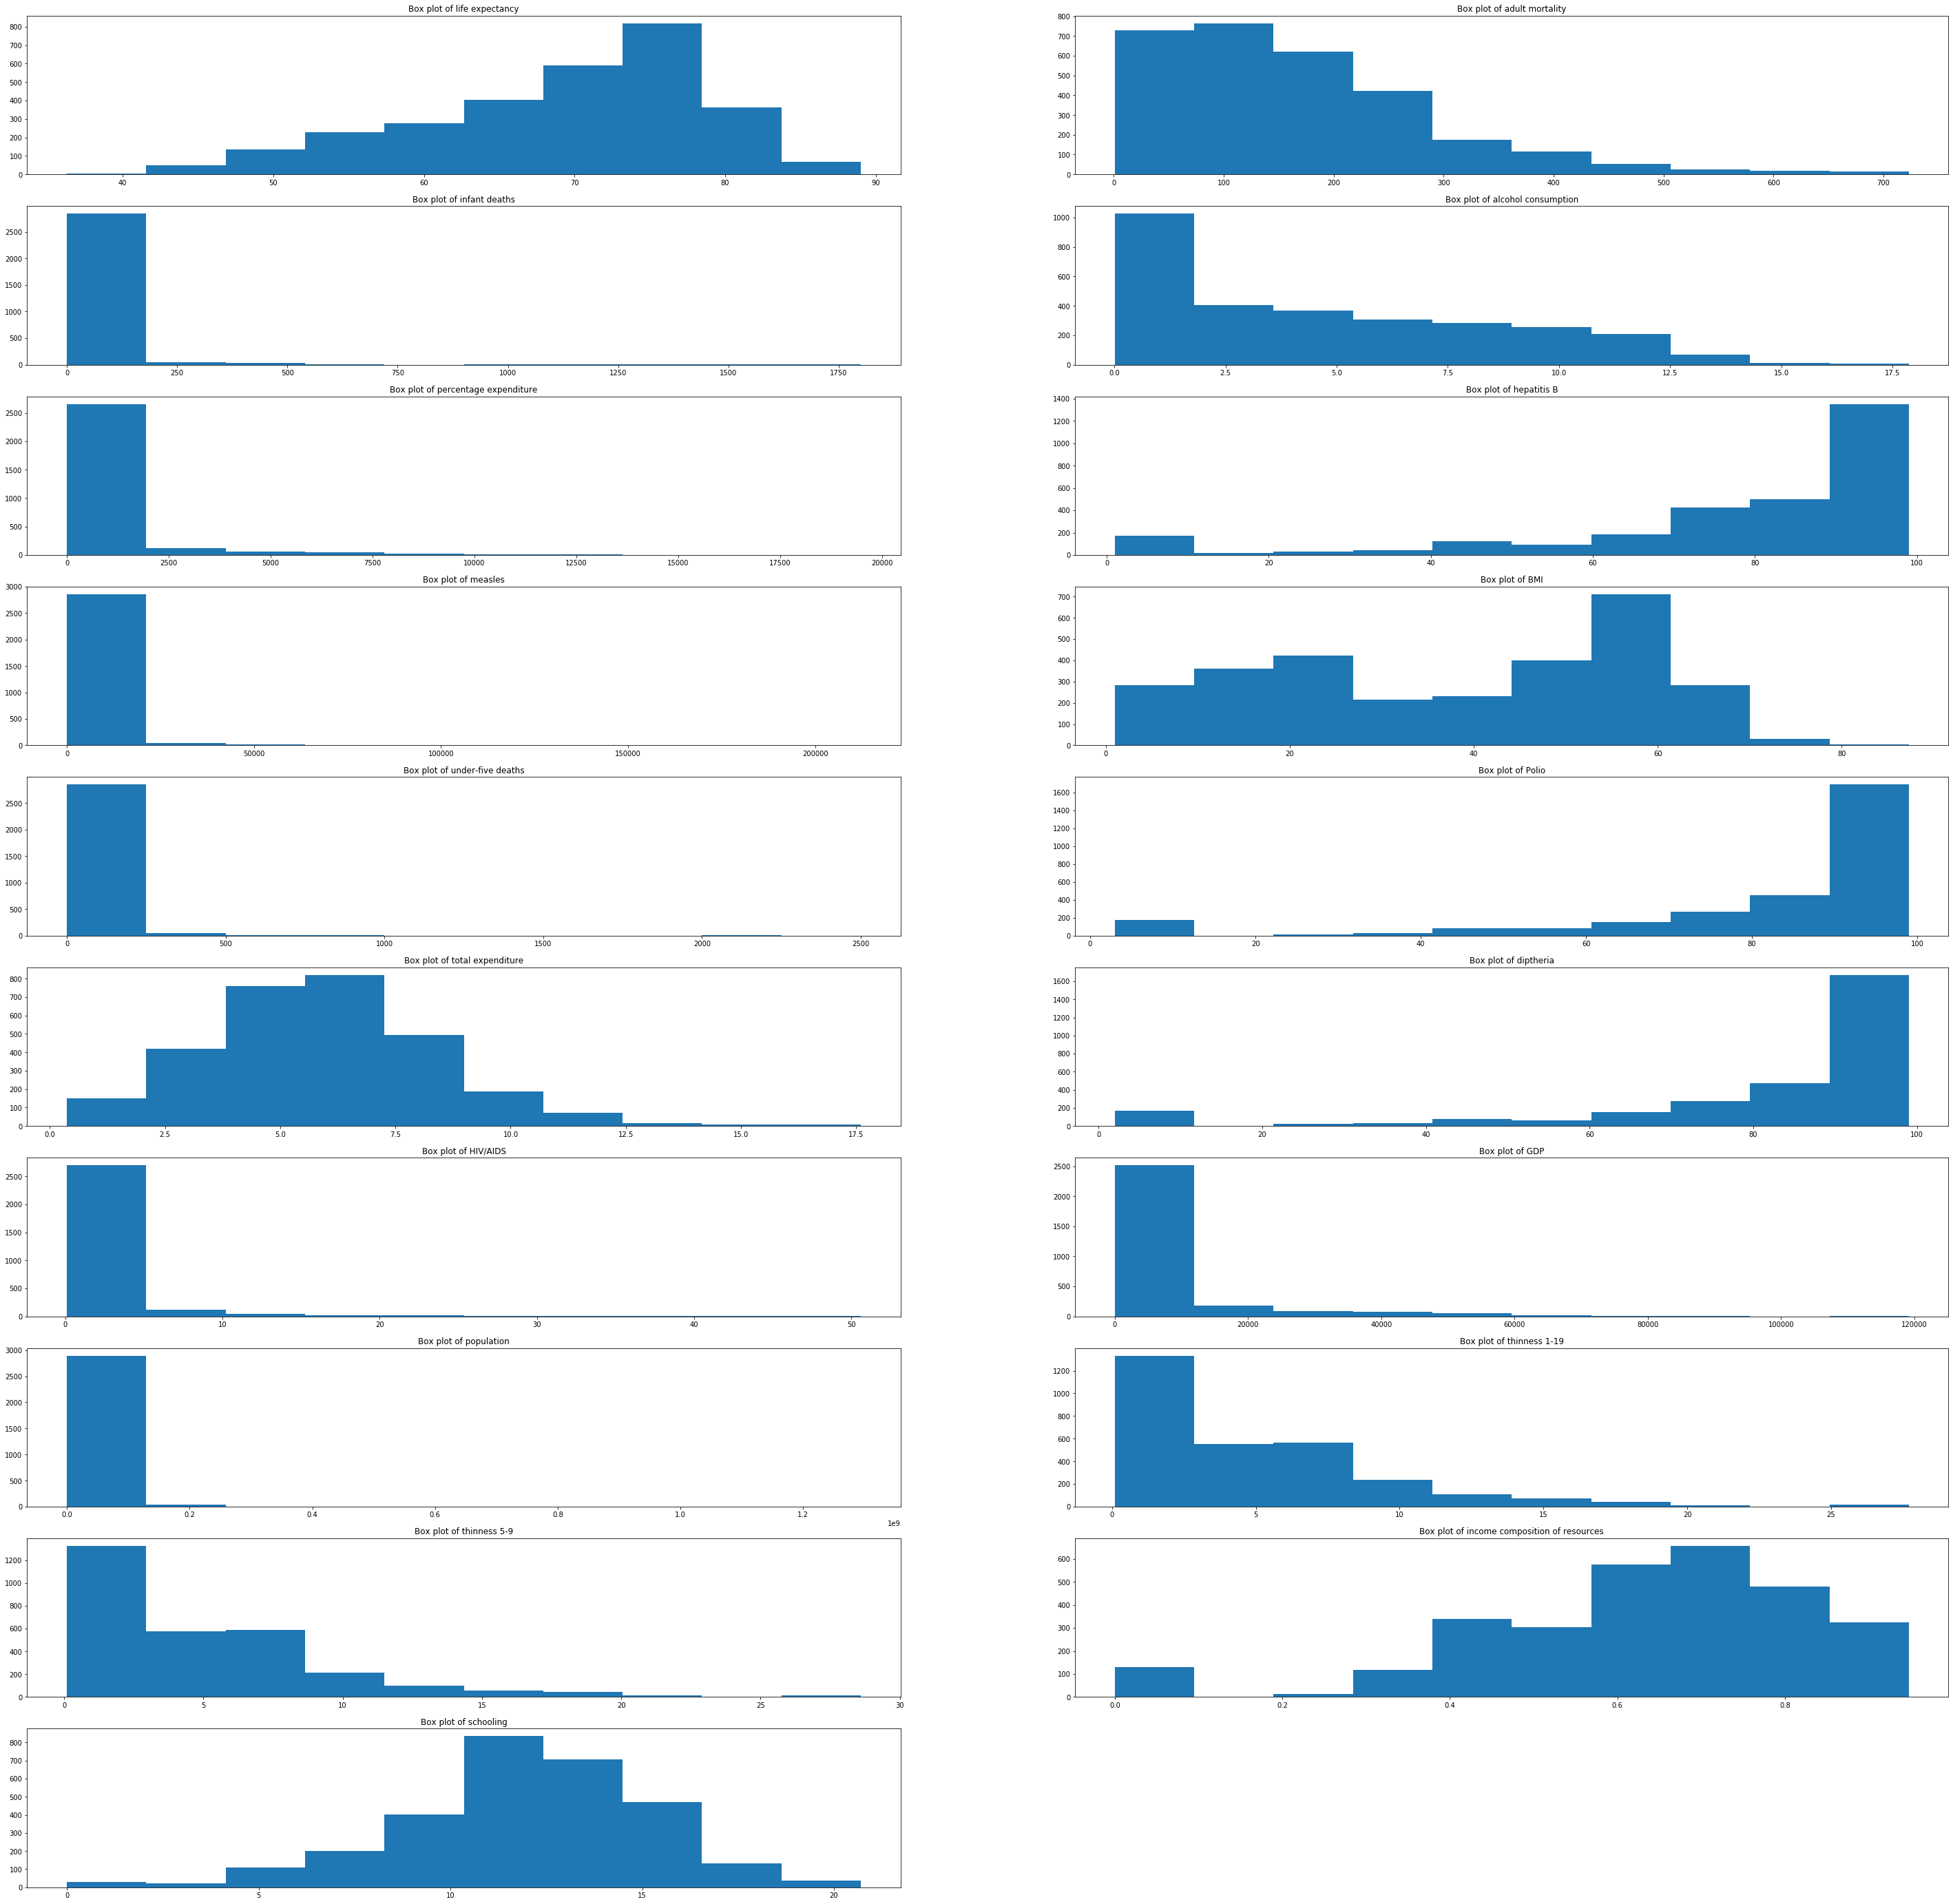

In [7]:
plt.figure(figsize = (50,50))

plt.subplot(10,2,1)
plt.hist(life_expec_df['Life expectancy '])
plt.title("Box plot of life expectancy")

plt.subplot(10,2,2)
plt.hist(life_expec_df['Adult Mortality'])
plt.title("Box plot of adult mortality")

plt.subplot(10,2,3)
plt.hist(life_expec_df['infant deaths'])
plt.title("Box plot of infant deaths")

plt.subplot(10,2,4)
plt.hist(life_expec_df['Alcohol'])
plt.title("Box plot of alcohol consumption")

plt.subplot(10,2,5)
plt.hist(life_expec_df['percentage expenditure'])
plt.title("Box plot of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(life_expec_df['Hepatitis B'])
plt.title("Box plot of hepatitis B")

plt.subplot(10,2,7)
plt.hist(life_expec_df['Measles '])
plt.title("Box plot of measles")

plt.subplot(10,2,8)
plt.hist(life_expec_df[' BMI '])
plt.title("Box plot of BMI")

plt.subplot(10,2,9)
plt.hist(life_expec_df['under-five deaths '])
plt.title("Box plot of under-five deaths")

plt.subplot(10,2,10)
plt.hist(life_expec_df['Polio'])
plt.title("Box plot of Polio")

plt.subplot(10,2,11)
plt.hist(life_expec_df['Total expenditure'])
plt.title("Box plot of total expenditure")

plt.subplot(10,2,12)
plt.hist(life_expec_df['Diphtheria '])
plt.title("Box plot of diptheria")

plt.subplot(10,2,13)
plt.hist(life_expec_df[' HIV/AIDS'])
plt.title("Box plot of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(life_expec_df['GDP'])
plt.title("Box plot of GDP")

plt.subplot(10,2,15)
plt.hist(life_expec_df['Population'])
plt.title("Box plot of population")

plt.subplot(10,2,16)
plt.hist(life_expec_df[' thinness  1-19 years'])
plt.title("Box plot of thinness 1-19")

plt.subplot(10,2,17)
plt.hist(life_expec_df[' thinness 5-9 years'])
plt.title("Box plot of thinness 5-9")

plt.subplot(10,2,18)
plt.hist(life_expec_df['Income composition of resources'])
plt.title("Box plot of income composition of resources")

plt.subplot(10,2,19)
plt.hist(life_expec_df['Schooling'])
plt.title("Box plot of schooling")

plt.show()

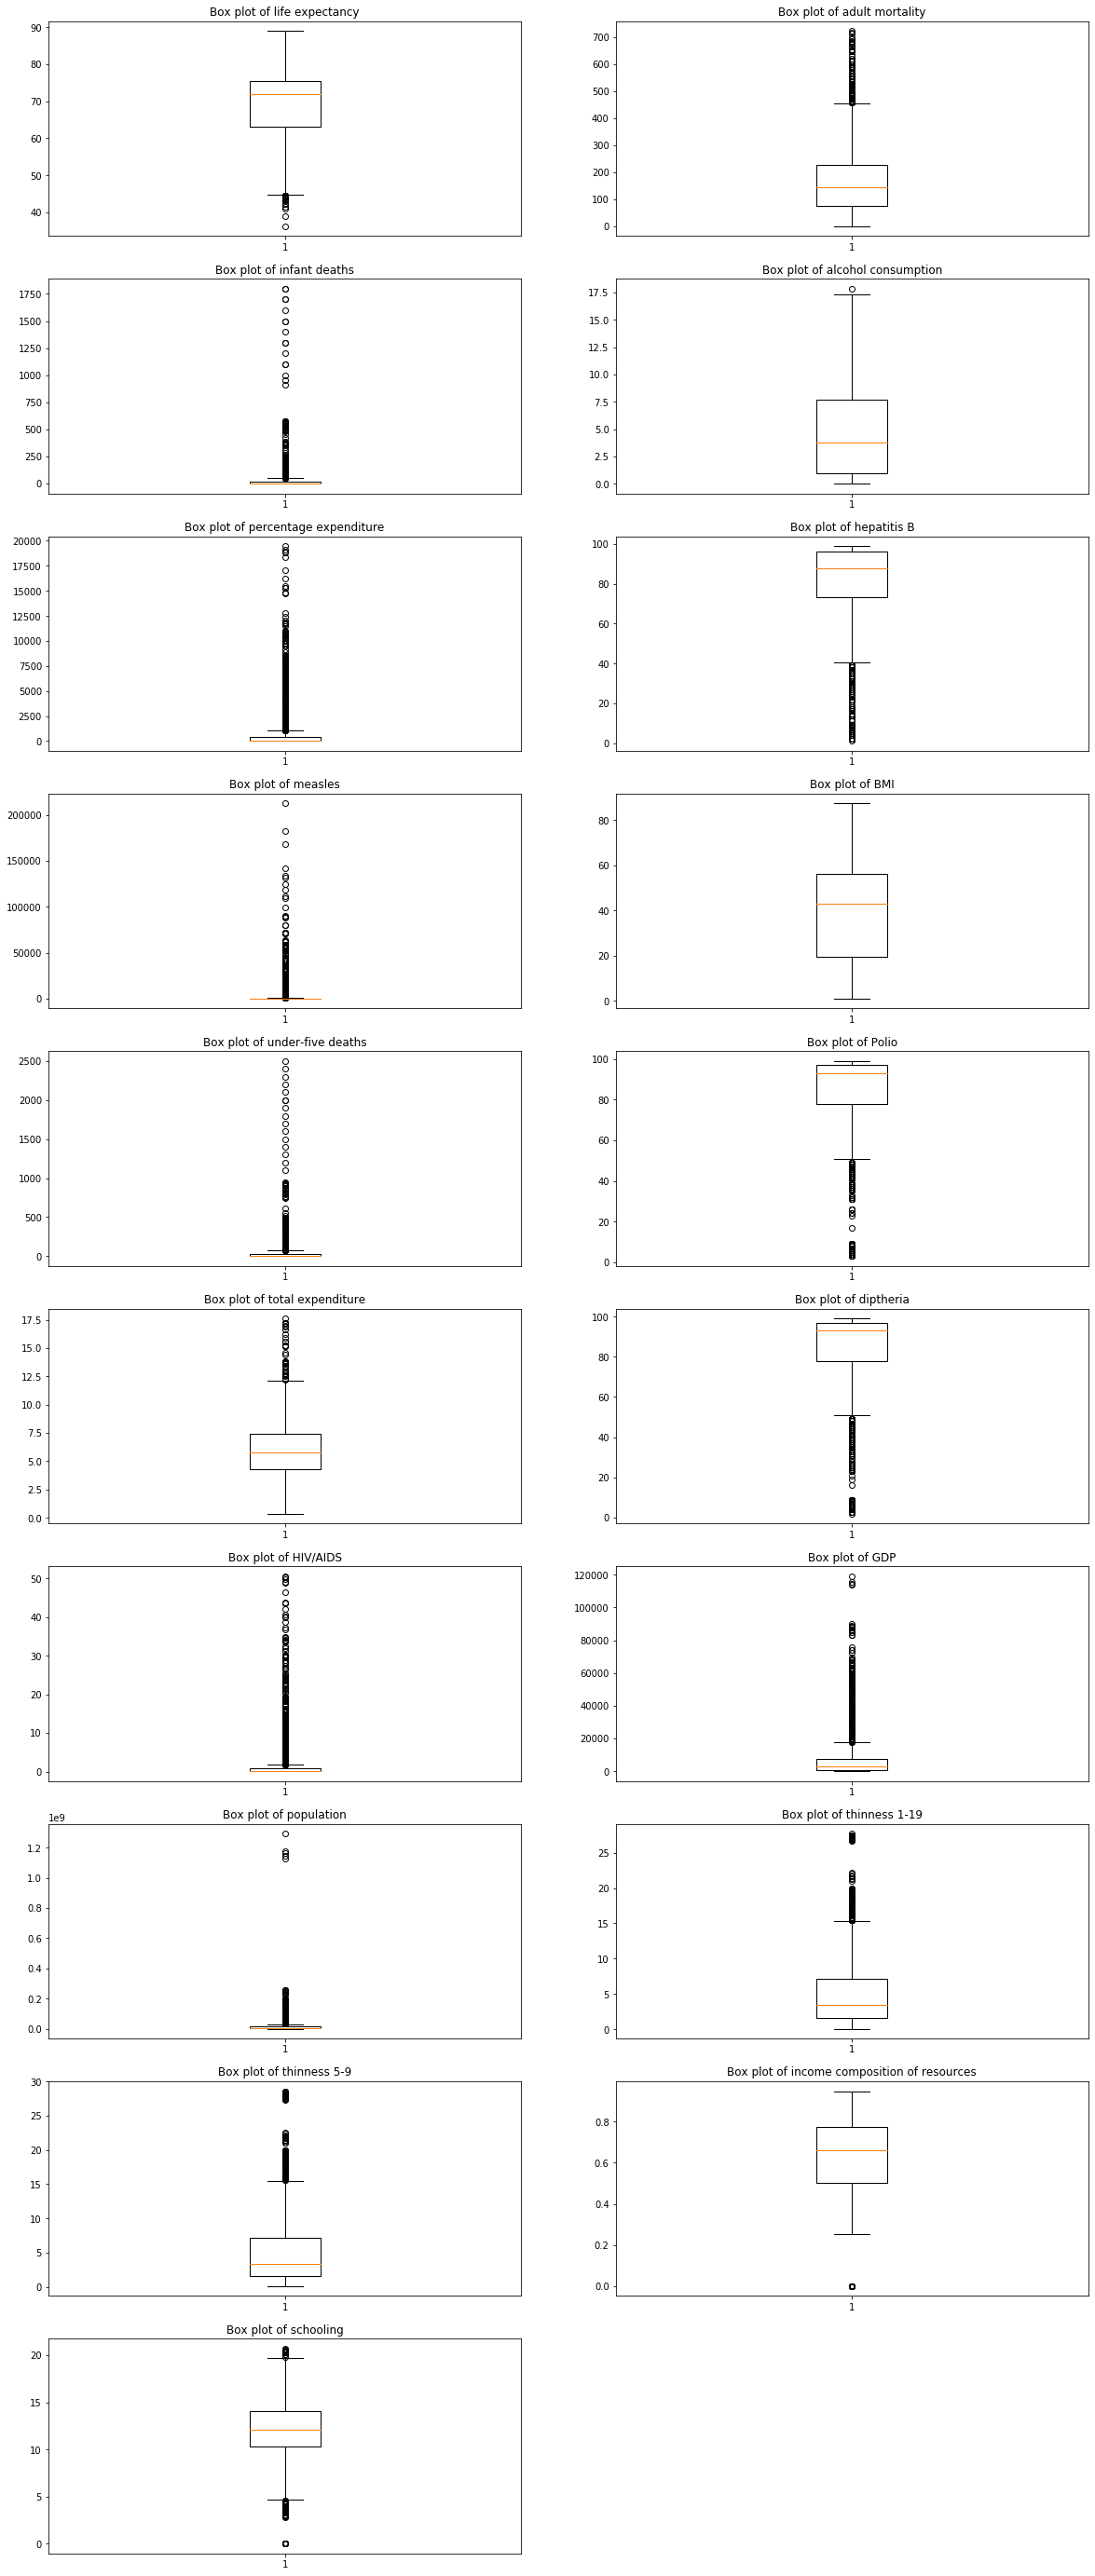

In [8]:
plt.figure(figsize = (20,50))

plt.subplot(10,2,1)
plt.boxplot(life_expec_df['Life expectancy '])
plt.title("Box plot of life expectancy")

plt.subplot(10,2,2)
plt.boxplot(life_expec_df['Adult Mortality'])
plt.title("Box plot of adult mortality")

plt.subplot(10,2,3)
plt.boxplot(life_expec_df['infant deaths'])
plt.title("Box plot of infant deaths")

plt.subplot(10,2,4)
plt.boxplot(life_expec_df['Alcohol'])
plt.title("Box plot of alcohol consumption")

plt.subplot(10,2,5)
plt.boxplot(life_expec_df['percentage expenditure'])
plt.title("Box plot of percentage expenditure")

plt.subplot(10,2,6)
plt.boxplot(life_expec_df['Hepatitis B'])
plt.title("Box plot of hepatitis B")

plt.subplot(10,2,7)
plt.boxplot(life_expec_df['Measles '])
plt.title("Box plot of measles")

plt.subplot(10,2,8)
plt.boxplot(life_expec_df[' BMI '])
plt.title("Box plot of BMI")

plt.subplot(10,2,9)
plt.boxplot(life_expec_df['under-five deaths '])
plt.title("Box plot of under-five deaths")

plt.subplot(10,2,10)
plt.boxplot(life_expec_df['Polio'])
plt.title("Box plot of Polio")

plt.subplot(10,2,11)
plt.boxplot(life_expec_df['Total expenditure'])
plt.title("Box plot of total expenditure")

plt.subplot(10,2,12)
plt.boxplot(life_expec_df['Diphtheria '])
plt.title("Box plot of diptheria")

plt.subplot(10,2,13)
plt.boxplot(life_expec_df[' HIV/AIDS'])
plt.title("Box plot of HIV/AIDS")

plt.subplot(10,2,14)
plt.boxplot(life_expec_df['GDP'])
plt.title("Box plot of GDP")

plt.subplot(10,2,15)
plt.boxplot(life_expec_df['Population'])
plt.title("Box plot of population")

plt.subplot(10,2,16)
plt.boxplot(life_expec_df[' thinness  1-19 years'])
plt.title("Box plot of thinness 1-19")

plt.subplot(10,2,17)
plt.boxplot(life_expec_df[' thinness 5-9 years'])
plt.title("Box plot of thinness 5-9")

plt.subplot(10,2,18)
plt.boxplot(life_expec_df['Income composition of resources'])
plt.title("Box plot of income composition of resources")

plt.subplot(10,2,19)
plt.boxplot(life_expec_df['Schooling'])
plt.title("Box plot of schooling")

plt.show()

In [9]:
#life_expec_df.loc[life_expec_df["Life expectancy "] < 40, ['Country', 'Year', 'Life expectancy ']] Haiti 2010 doesn't seem right, but perhaps due to the earthquake.
#life_expec_df.loc[life_expec_df["infant deaths"] > 1000, ['Country', 'Year', 'infant deaths']] Over 1,000 deaths per 1,000 people...
#life_expec_df.loc[life_expec_df["percentage expenditure"] > 15000, ['Country', 'Year', 'percentage expenditure']]
#life_expec_df.loc[life_expec_df["Measles "] > 100000, ['Country', 'Year', 'Measles ']]
#life_expec_df.loc[life_expec_df["under-five deaths "] > 1000, ['Country', 'Year', 'under-five deaths ']] Matches infant data
#life_expec_df.loc[life_expec_df["Schooling"] == 0, ['Country', 'Year', 'Schooling']] Quite a few reporting 0 years.
#life_expec_df.loc[life_expec_df["Income composition of resources"] == 0, ['Country', 'Year', 'Income composition of resources']]
#life_expec_df.loc[life_expec_df["GDP"] > 100000, ['Country', 'Year', 'GDP']]
#life_expec_df.loc[life_expec_df["infant deaths"] == 0, ['Country', 'Year', 'infant deaths']]
#life_expec_df.loc[life_expec_df["percentage expenditure"] == 0, ['Country', 'Year', 'percentage expenditure']]
#life_expec_df.loc[life_expec_df["Measles "] == 0, ['Country', 'Year', 'Measles ']]
#life_expec_df.loc[life_expec_df["under-five deaths "] == 0, ['Country', 'Year', 'under-five deaths ']]


I found that there are 848 rows of data with 0 infant deaths per 1,000 people. That seems a bit strange, especially for an island country like Vanuatu where malaria is a big problem. The same problem exists for percentage expenditure, Measles and under-five deaths.

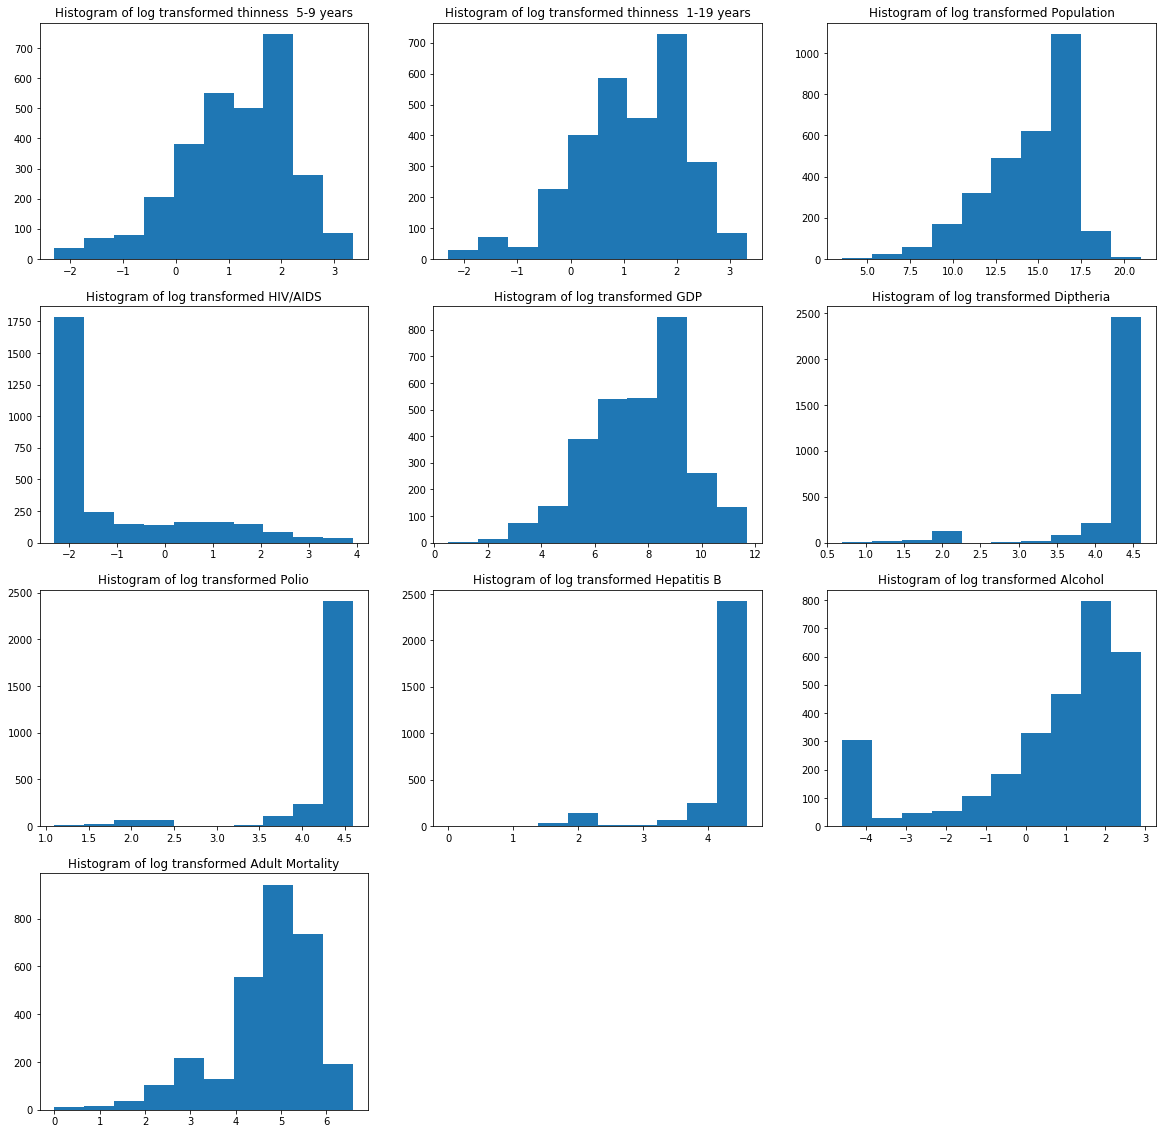

In [10]:
# attempt log transforming the data with the most outliers:
# Infant deaths
# Percentage expenditure
# Measles
# Under five deaths
# HIV
# Population
# Thinness 5-9
# Thinness 1-19
# GDP
# Diphtheria
# Polio
# Hep B
# Alcohol
# Adult mortality


# Doesn't work due to 0's
# plt.hist(np.log(life_expec_df['infant deaths']))
# plt.title("Histogram of log transformed infant deaths")
# plt.show()


# plt.hist(np.log(life_expec_df['percentage expenditure']))
# plt.title("Histogram of log transformed percentage expenditure")
# plt.show()

# plt.hist(np.log(life_expec_df['Measles ']))
# plt.title("Histogram of log transformed Measles")
# plt.show()

# plt.hist(np.log(life_expec_df['under-five deaths ']))
# plt.title("Histogram of log transformed under-five deaths")
# plt.show()

# These all work:

plt.figure(figsize=(20,20))

plt.subplot(4, 3, 1)
plt.hist(np.log(life_expec_df[' thinness 5-9 years']))
plt.title("Histogram of log transformed thinness  5-9 years")

plt.subplot(4, 3, 2)
plt.hist(np.log(life_expec_df[' thinness  1-19 years']))
plt.title("Histogram of log transformed thinness  1-19 years")

plt.subplot(4, 3, 3)
plt.hist(np.log(life_expec_df['Population']))
plt.title("Histogram of log transformed Population")

plt.subplot(4, 3, 4)
plt.hist(np.log(life_expec_df[' HIV/AIDS']))
plt.title("Histogram of log transformed HIV/AIDS")

plt.subplot(4, 3, 5)
plt.hist(np.log(life_expec_df['GDP']))
plt.title("Histogram of log transformed GDP")

plt.subplot(4, 3, 6)
plt.hist(np.log(life_expec_df['Diphtheria ']))
plt.title("Histogram of log transformed Diptheria")

plt.subplot(4, 3, 7)
plt.hist(np.log(life_expec_df['Polio']))
plt.title("Histogram of log transformed Polio")

plt.subplot(4, 3, 8)
plt.hist(np.log(life_expec_df['Hepatitis B']))
plt.title("Histogram of log transformed Hepatitis B")

plt.subplot(4, 3, 9)
plt.hist(np.log(life_expec_df['Alcohol']))
plt.title("Histogram of log transformed Alcohol")

plt.subplot(4, 3, 10)
plt.hist(np.log(life_expec_df['Adult Mortality']))
plt.title("Histogram of log transformed Adult Mortality")
plt.show()

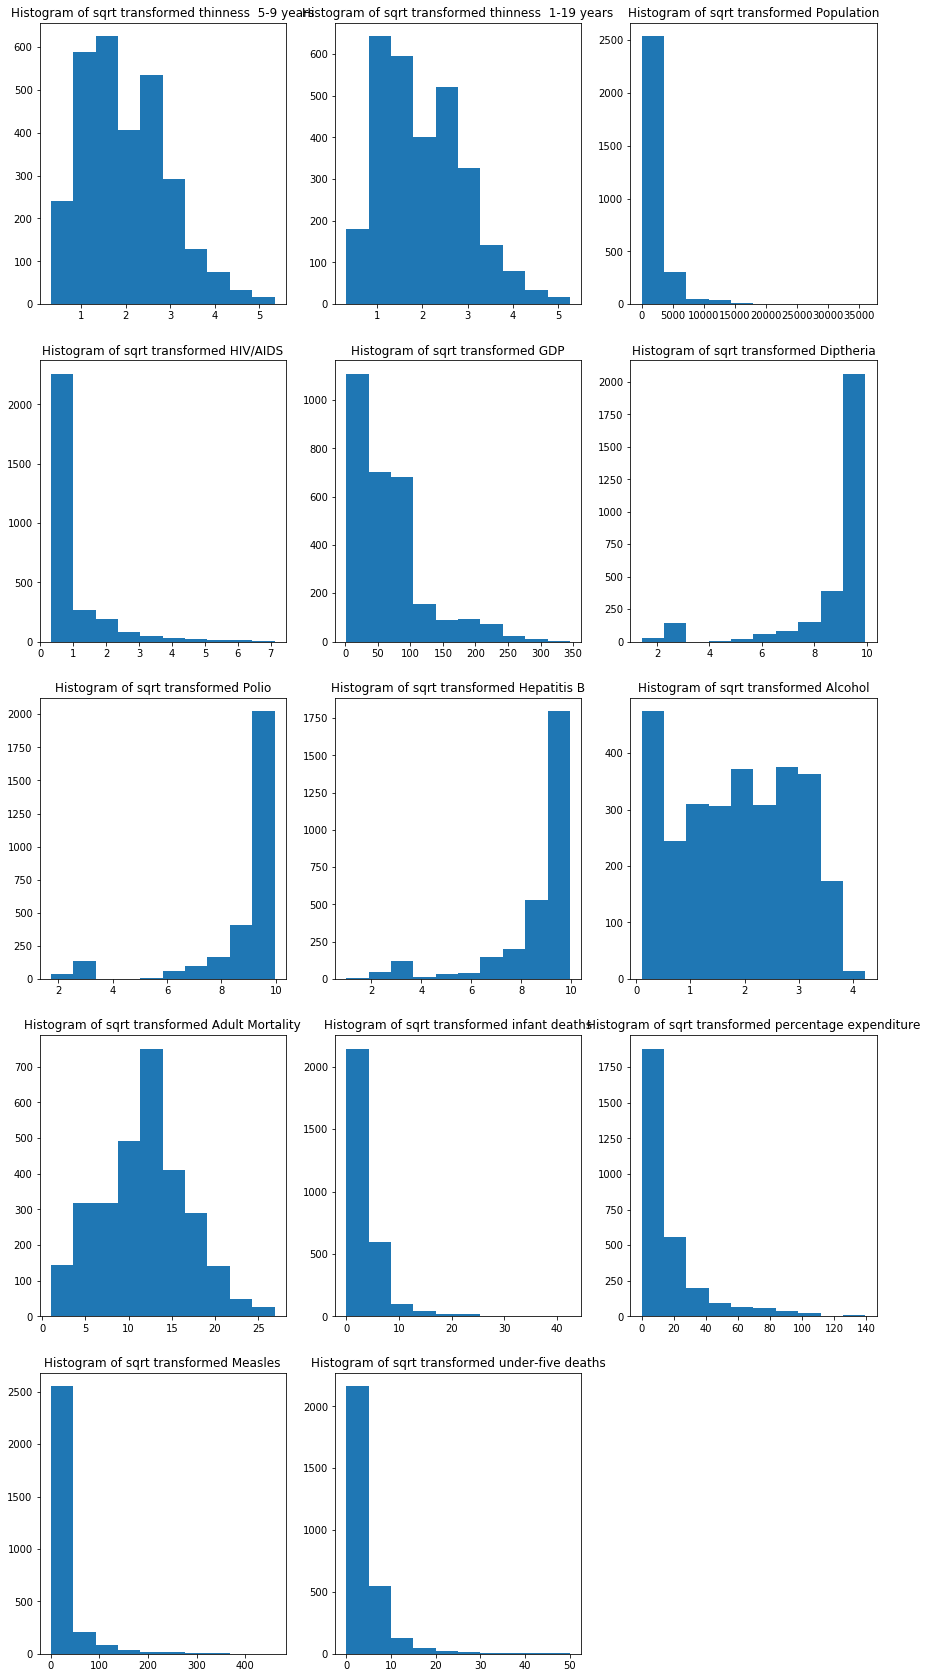

In [11]:
plt.figure(figsize=(15,30))

plt.subplot(5, 3, 1)
plt.hist(np.sqrt(life_expec_df[' thinness 5-9 years']))
plt.title("Histogram of sqrt transformed thinness  5-9 years")

plt.subplot(5, 3, 2)
plt.hist(np.sqrt(life_expec_df[' thinness  1-19 years']))
plt.title("Histogram of sqrt transformed thinness  1-19 years")

plt.subplot(5, 3, 3)
plt.hist(np.sqrt(life_expec_df['Population']))
plt.title("Histogram of sqrt transformed Population")

plt.subplot(5, 3, 4)
plt.hist(np.sqrt(life_expec_df[' HIV/AIDS']))
plt.title("Histogram of sqrt transformed HIV/AIDS")

plt.subplot(5, 3, 5)
plt.hist(np.sqrt(life_expec_df['GDP']))
plt.title("Histogram of sqrt transformed GDP")

plt.subplot(5, 3, 6)
plt.hist(np.sqrt(life_expec_df['Diphtheria ']))
plt.title("Histogram of sqrt transformed Diptheria")

plt.subplot(5, 3, 7)
plt.hist(np.sqrt(life_expec_df['Polio']))
plt.title("Histogram of sqrt transformed Polio")

plt.subplot(5, 3, 8)
plt.hist(np.sqrt(life_expec_df['Hepatitis B']))
plt.title("Histogram of sqrt transformed Hepatitis B")

plt.subplot(5, 3, 9)
plt.hist(np.sqrt(life_expec_df['Alcohol']))
plt.title("Histogram of sqrt transformed Alcohol")

plt.subplot(5, 3, 10)
plt.hist(np.sqrt(life_expec_df['Adult Mortality']))
plt.title("Histogram of sqrt transformed Adult Mortality")

plt.subplot(5, 3, 11)
plt.hist(np.sqrt(life_expec_df['infant deaths']))
plt.title("Histogram of sqrt transformed infant deaths")

plt.subplot(5, 3, 12)
plt.hist(np.sqrt(life_expec_df['percentage expenditure']))
plt.title("Histogram of sqrt transformed percentage expenditure")

plt.subplot(5, 3, 13)
plt.hist(np.sqrt(life_expec_df['Measles ']))
plt.title("Histogram of sqrt transformed Measles")

plt.subplot(5, 3, 14)
plt.hist(np.sqrt(life_expec_df['under-five deaths ']))
plt.title("Histogram of sqrt transformed under-five deaths")

plt.show()

As stated above, I have a lot of zero values that don't make sense. I could either replace them with the country/global mean, winsorize the data, or drop them. The problem with winsorization is that instead of having the values bunch up at zero I'd have them bunch up at the 95th percentile for example. I think replacing them by the mean will have a less detrimental effect overall. 

In [12]:
life_expec_df = life_expec_df.replace(to_replace=0, value=np.nan)
life_expec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2090 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2327 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            1955 non-null float64
 BMI                               2938 non-null float64
under-five deaths                  2153 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 no

In [13]:
for column_name in life_expec_df:
         print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in infant deaths : 28.863172226004085
Percent null values in Alcohol : 0.0
Percent null values in percentage expenditure : 20.79646017699115
Percent null values in Hepatitis B : 0.0
Percent null values in Measles  : 33.45813478556841
Percent null values in  BMI  : 0.0
Percent null values in under-five deaths  : 26.718856364874064
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 0.0
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in  thinness  1-19 years : 0.0
Percent null values in  thinness 5-9 years : 0.0
Percent null values in Income composition of resources : 4.424778761061947
Percent null values in Schooling : 0.953

In [18]:
life_expec_df = life_expec_df.rename(columns={"Life expectancy ": "Life Expectancy", "infant deaths": "Infant Deaths", "percentage expenditure": "Percent Expenditure", "Measles ": "Measles", " BMI ": "BMI", "under-five deaths ": "Under-Five Deaths", "Total expenditure": "Total Expenditure", "Diphtheria ": "Diphtheria", " HIV/AIDS":"HIV/AIDS", " thinness  1-19 years": "Thinness 1-19 Year Olds", " thinness 5-9 years": "Thinness 5-9 Year Olds", "Income composition of resources": "Income Composition"})


fill_list2 = ['Infant Deaths', 'Percent Expenditure', "Measles", "Under-Five Deaths", "Income Composition", "Schooling"]

# Do a country by country imputation to see if we can get rid of some of the zero/NaN values.
for col in fill_list2:
    for country in countries:
        life_expec_df.loc[life_expec_df["Country"] == country, col] = life_expec_df.loc[life_expec_df["Country"] == country, col].fillna(
            life_expec_df[life_expec_df["Country"] == country][col].mean())

for column_name in life_expec_df:
         print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))


Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life Expectancy : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in Infant Deaths : 0.0
Percent null values in Alcohol : 0.0
Percent null values in Percent Expenditure : 0.0
Percent null values in Hepatitis B : 0.0
Percent null values in Measles : 0.0
Percent null values in BMI : 0.0
Percent null values in Under-Five Deaths : 0.0
Percent null values in Polio : 0.0
Percent null values in Total Expenditure : 0.0
Percent null values in Diphtheria : 0.0
Percent null values in HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in Thinness 1-19 Year Olds : 0.0
Percent null values in Thinness 5-9 Year Olds : 0.0
Percent null values in Income Composition : 0.0
Percent null values in Schooling : 0.0


By country imputation improved the NaN rates somewhat. I'll now apply global means to fill in the rest. 

In [19]:
for col in fill_list2:
    life_expec_df.loc[:,col] = life_expec_df.loc[:,col].fillna(life_expec_df.loc[:,col].mean())
    
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life Expectancy : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in Infant Deaths : 0.0
Percent null values in Alcohol : 0.0
Percent null values in Percent Expenditure : 0.0
Percent null values in Hepatitis B : 0.0
Percent null values in Measles : 0.0
Percent null values in BMI : 0.0
Percent null values in Under-Five Deaths : 0.0
Percent null values in Polio : 0.0
Percent null values in Total Expenditure : 0.0
Percent null values in Diphtheria : 0.0
Percent null values in HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in Thinness 1-19 Year Olds : 0.0
Percent null values in Thinness 5-9 Year Olds : 0.0
Percent null values in Income Composition : 0.0
Percent null values in Schooling : 0.0


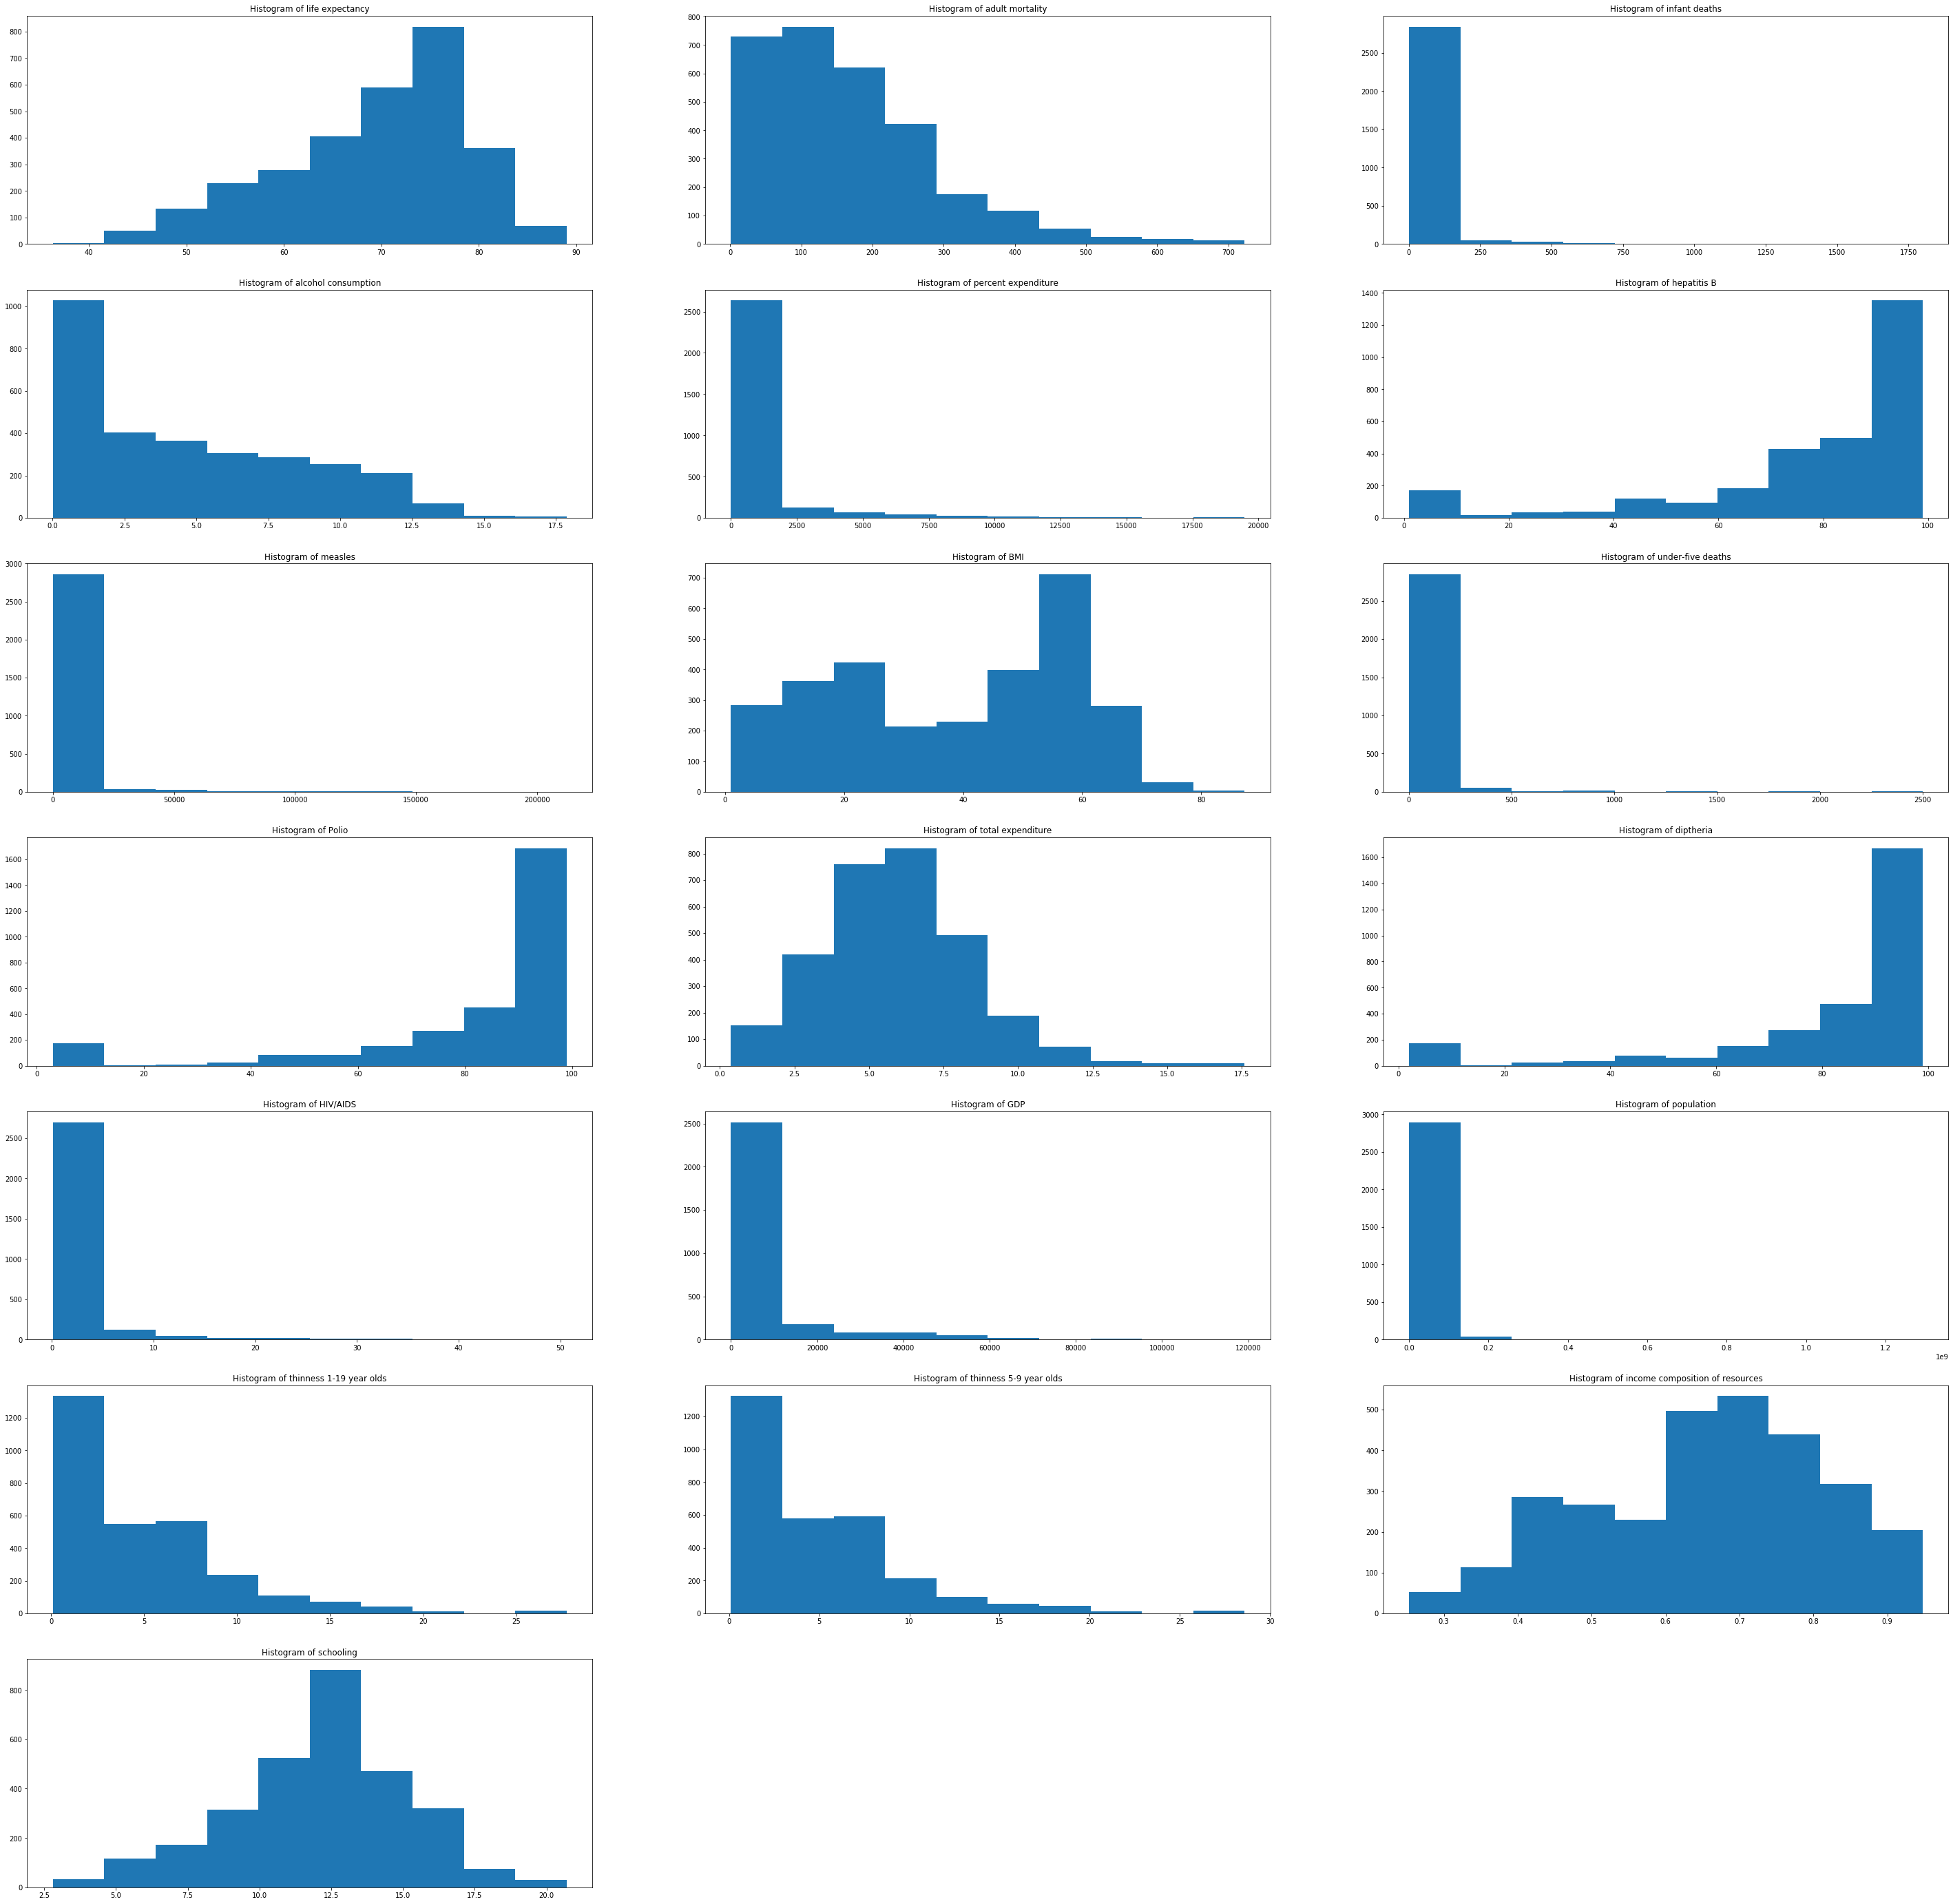

In [23]:
plt.figure(figsize = (50,50))

plt.subplot(7,3,1) # Best
plt.hist(life_expec_df['Life Expectancy'])
plt.title("Histogram of life expectancy")

plt.subplot(7,3,2)
plt.hist(life_expec_df['Adult Mortality'])
plt.title("Histogram of adult mortality")

plt.subplot(7,3,3)
plt.hist(life_expec_df['Infant Deaths'])
plt.title("Histogram of infant deaths")

plt.subplot(7,3,4)
plt.hist(life_expec_df['Alcohol'])
plt.title("Histogram of alcohol consumption")

plt.subplot(7,3,5)
plt.hist(life_expec_df['Percent Expenditure'])
plt.title("Histogram of percent expenditure")

plt.subplot(7,3,6) # Best
plt.hist(life_expec_df['Hepatitis B'])
plt.title("Histogram of hepatitis B")

plt.subplot(7,3,7)
plt.hist(life_expec_df['Measles'])
plt.title("Histogram of measles")

plt.subplot(7,3,8) # Best
plt.hist(life_expec_df['BMI'])
plt.title("Histogram of BMI")

plt.subplot(7,3,9)
plt.hist(life_expec_df['Under-Five Deaths'])
plt.title("Histogram of under-five deaths")

plt.subplot(7,3,10)
plt.hist(life_expec_df['Polio'])
plt.title("Histogram of Polio")

plt.subplot(7,3,11)
plt.hist(life_expec_df['Total Expenditure'])
plt.title("Histogram of total expenditure")

plt.subplot(7,3,12) # Best
plt.hist(life_expec_df['Diphtheria'])
plt.title("Histogram of diptheria")

plt.subplot(7,3,13)
plt.hist(life_expec_df['HIV/AIDS'])
plt.title("Histogram of HIV/AIDS")

plt.subplot(7,3,14)
plt.hist(life_expec_df['GDP'])
plt.title("Histogram of GDP")

plt.subplot(7,3,15)
plt.hist(life_expec_df['Population'])
plt.title("Histogram of population")

plt.subplot(7,3,16)
plt.hist(life_expec_df['Thinness 1-19 Year Olds'])
plt.title("Histogram of thinness 1-19 year olds")

plt.subplot(7,3,17)
plt.hist(life_expec_df['Thinness 5-9 Year Olds'])
plt.title("Histogram of thinness 5-9 year olds")

plt.subplot(7,3,18)
plt.hist(life_expec_df['Income Composition'])
plt.title("Histogram of income composition of resources")

plt.subplot(7,3,19)
plt.hist(life_expec_df['Schooling'])
plt.title("Histogram of schooling")

plt.show()

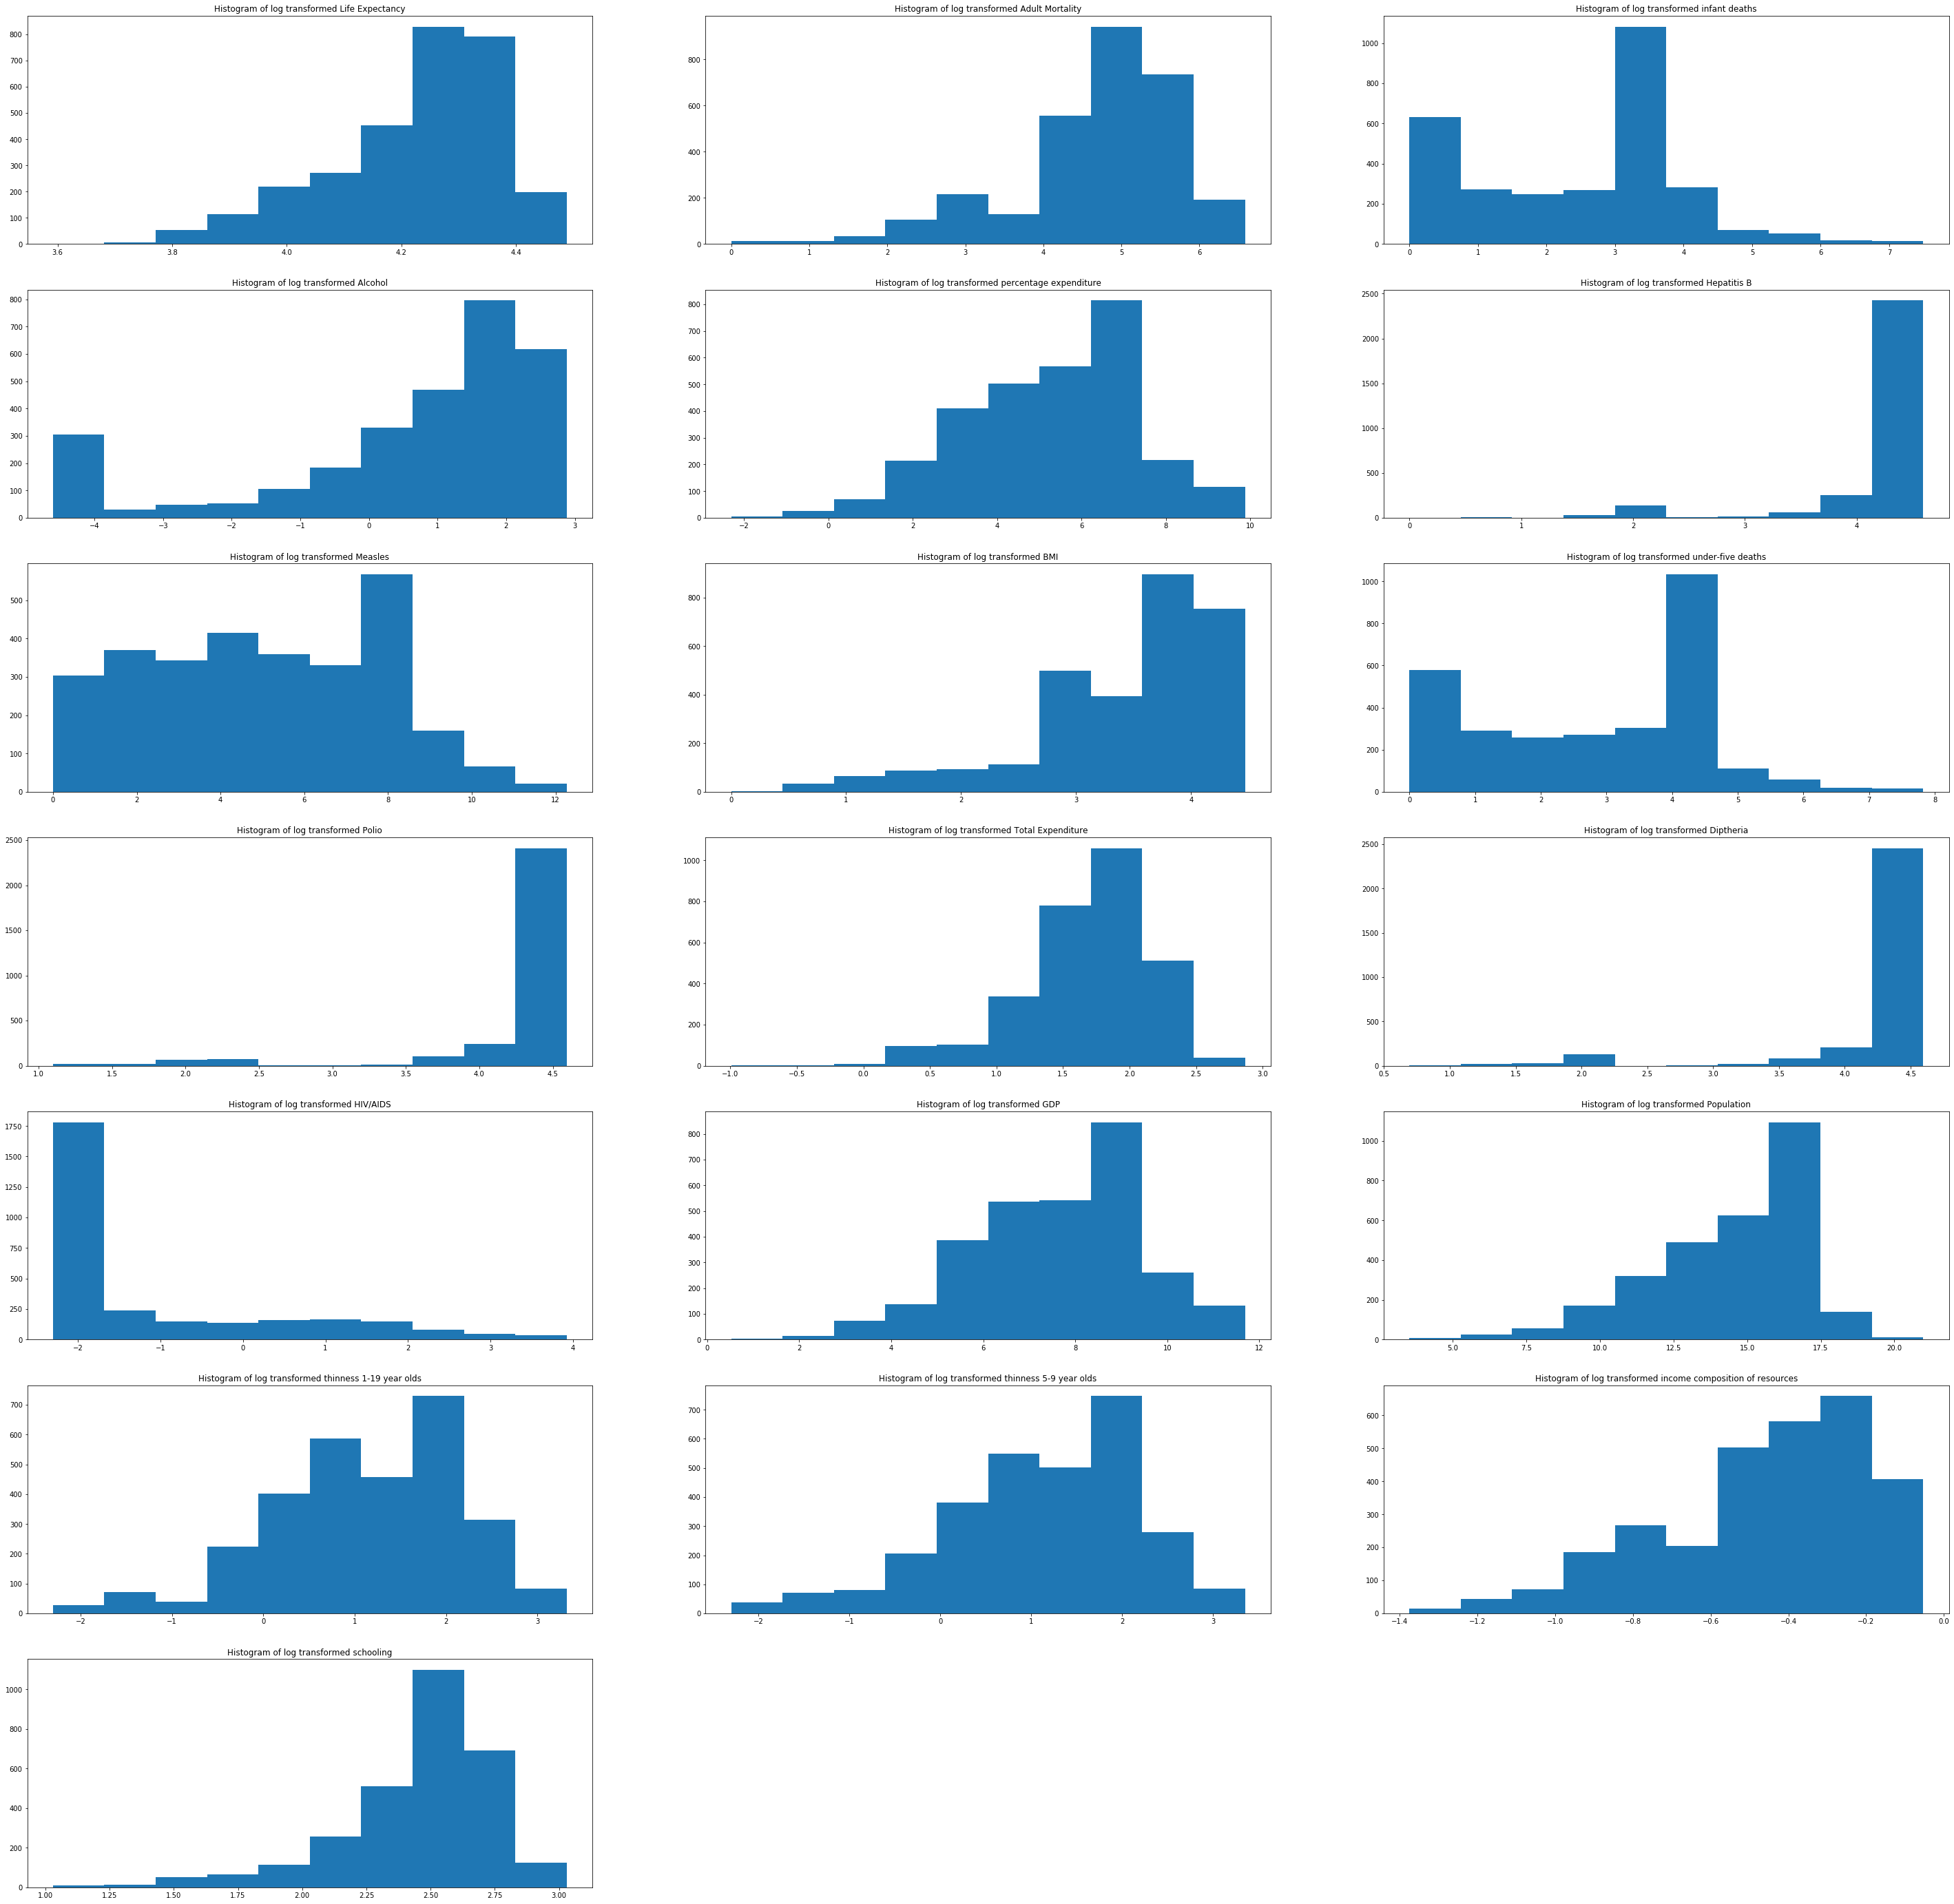

In [22]:
plt.figure(figsize = (50,50))

plt.subplot(7, 3, 1)
plt.hist(np.log(life_expec_df['Life Expectancy']))
plt.title("Histogram of log transformed Life Expectancy")

plt.subplot(7, 3, 2)
plt.hist(np.log(life_expec_df['Adult Mortality']))
plt.title("Histogram of log transformed Adult Mortality")

plt.subplot(7, 3, 3) # Best
plt.hist(np.log(life_expec_df['Infant Deaths']))
plt.title("Histogram of log transformed infant deaths")

plt.subplot(7, 3, 4)
plt.hist(np.log(life_expec_df['Alcohol']))
plt.title("Histogram of log transformed Alcohol")

plt.subplot(7, 3, 5) # Best
plt.hist(np.log(life_expec_df['Percent Expenditure']))
plt.title("Histogram of log transformed percentage expenditure")

plt.subplot(7, 3, 6)
plt.hist(np.log(life_expec_df['Hepatitis B']))
plt.title("Histogram of log transformed Hepatitis B")

plt.subplot(7, 3, 7) # Best
plt.hist(np.log(life_expec_df['Measles']))
plt.title("Histogram of log transformed Measles")

plt.subplot(7, 3, 8)
plt.hist(np.log(life_expec_df['BMI']))
plt.title("Histogram of log transformed BMI")

plt.subplot(7, 3, 9) # Best
plt.hist(np.log(life_expec_df['Under-Five Deaths']))
plt.title("Histogram of log transformed under-five deaths")

plt.subplot(7, 3, 10)
plt.hist(np.log(life_expec_df['Polio']))
plt.title("Histogram of log transformed Polio")

plt.subplot(7, 3, 11)
plt.hist(np.log(life_expec_df['Total Expenditure']))
plt.title("Histogram of log transformed Total Expenditure")

plt.subplot(7, 3, 12)
plt.hist(np.log(life_expec_df['Diphtheria']))
plt.title("Histogram of log transformed Diptheria")

plt.subplot(7, 3, 13) # Best
plt.hist(np.log(life_expec_df['HIV/AIDS']))
plt.title("Histogram of log transformed HIV/AIDS")

plt.subplot(7, 3, 14)
plt.hist(np.log(life_expec_df['GDP']))
plt.title("Histogram of log transformed GDP")

plt.subplot(7, 3, 15)
plt.hist(np.log(life_expec_df['Population']))
plt.title("Histogram of log transformed Population")

plt.subplot(7,3,16)
plt.hist(np.log(life_expec_df['Thinness 1-19 Year Olds']))
plt.title("Histogram of log transformed thinness 1-19 year olds")

plt.subplot(7,3,17)
plt.hist(np.log(life_expec_df['Thinness 5-9 Year Olds']))
plt.title("Histogram of log transformed thinness 5-9 year olds")

plt.subplot(7,3,18)
plt.hist(np.log(life_expec_df['Income Composition']))
plt.title("Histogram of log transformed income composition of resources")

plt.subplot(7,3,19)
plt.hist(np.log(life_expec_df['Schooling']))
plt.title("Histogram of log transformed schooling")

plt.show()


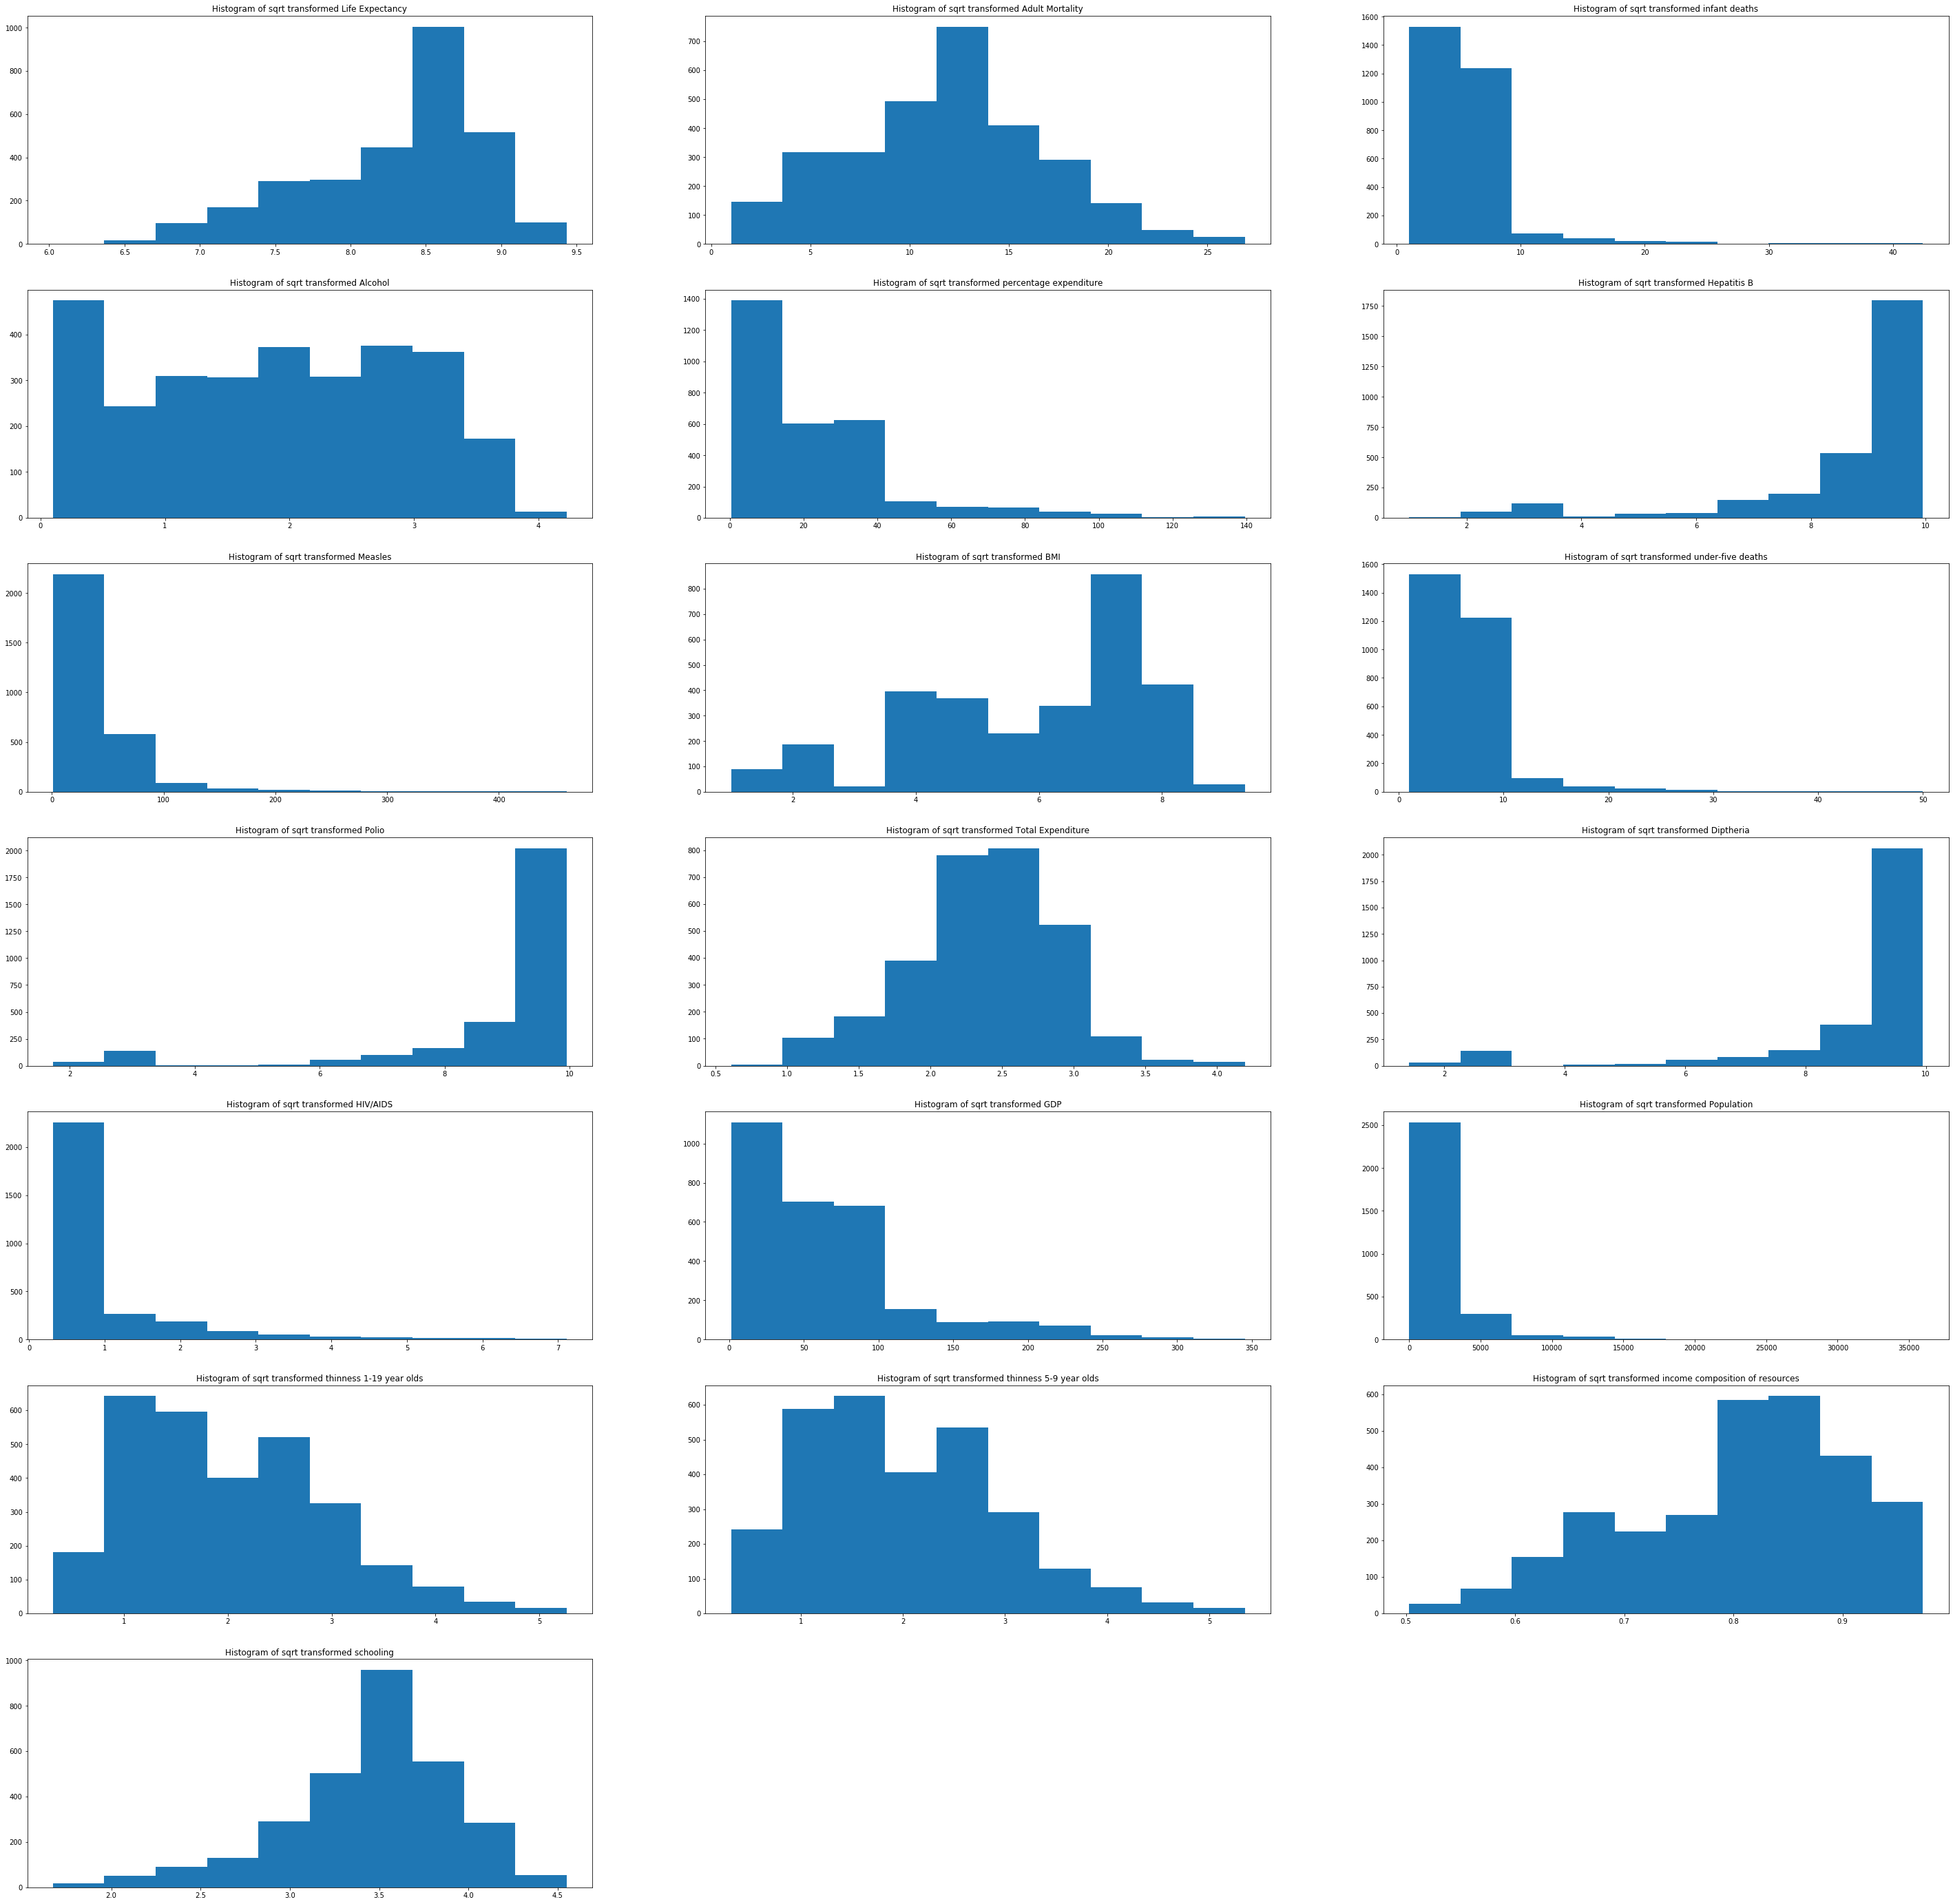

In [24]:
plt.figure(figsize = (50,50))

plt.subplot(7, 3, 1)
plt.hist(np.sqrt(life_expec_df['Life Expectancy']))
plt.title("Histogram of sqrt transformed Life Expectancy")

plt.subplot(7, 3, 2) # Best
plt.hist(np.sqrt(life_expec_df['Adult Mortality']))
plt.title("Histogram of sqrt transformed Adult Mortality")

plt.subplot(7, 3, 3)
plt.hist(np.sqrt(life_expec_df['Infant Deaths']))
plt.title("Histogram of sqrt transformed infant deaths")

plt.subplot(7, 3, 4) # Best
plt.hist(np.sqrt(life_expec_df['Alcohol']))
plt.title("Histogram of sqrt transformed Alcohol")

plt.subplot(7, 3, 5)
plt.hist(np.sqrt(life_expec_df['Percent Expenditure']))
plt.title("Histogram of sqrt transformed percentage expenditure")

plt.subplot(7, 3, 6)
plt.hist(np.sqrt(life_expec_df['Hepatitis B']))
plt.title("Histogram of sqrt transformed Hepatitis B")

plt.subplot(7, 3, 7)
plt.hist(np.sqrt(life_expec_df['Measles']))
plt.title("Histogram of sqrt transformed Measles")

plt.subplot(7, 3, 8)
plt.hist(np.sqrt(life_expec_df['BMI']))
plt.title("Histogram of sqrt transformed BMI")

plt.subplot(7, 3, 9)
plt.hist(np.sqrt(life_expec_df['Under-Five Deaths']))
plt.title("Histogram of sqrt transformed under-five deaths")

plt.subplot(7, 3, 10) # Best
plt.hist(np.sqrt(life_expec_df['Polio']))
plt.title("Histogram of sqrt transformed Polio")

plt.subplot(7, 3, 11) # Best
plt.hist(np.sqrt(life_expec_df['Total Expenditure']))
plt.title("Histogram of sqrt transformed Total Expenditure")

plt.subplot(7, 3, 12)
plt.hist(np.sqrt(life_expec_df['Diphtheria']))
plt.title("Histogram of sqrt transformed Diptheria")

plt.subplot(7, 3, 13)
plt.hist(np.sqrt(life_expec_df['HIV/AIDS']))
plt.title("Histogram of sqrt transformed HIV/AIDS")

plt.subplot(7, 3, 14)
plt.hist(np.sqrt(life_expec_df['GDP']))
plt.title("Histogram of sqrt transformed GDP")

plt.subplot(7, 3, 15)
plt.hist(np.sqrt(life_expec_df['Population']))
plt.title("Histogram of sqrt transformed Population")

plt.subplot(7,3,16)
plt.hist(np.sqrt(life_expec_df['Thinness 1-19 Year Olds']))
plt.title("Histogram of sqrt transformed thinness 1-19 year olds")

plt.subplot(7,3,17)
plt.hist(np.sqrt(life_expec_df['Thinness 5-9 Year Olds']))
plt.title("Histogram of sqrt transformed thinness 5-9 year olds")

plt.subplot(7,3,18)
plt.hist(np.sqrt(life_expec_df['Income Composition']))
plt.title("Histogram of sqrt transformed income composition of resources")

plt.subplot(7,3,19)
plt.hist(np.sqrt(life_expec_df['Schooling']))
plt.title("Histogram of sqrt transformed schooling")

plt.show()